In [20]:
from load_data import load_data
import matplotlib.pyplot as plt

In [21]:
x_train, y_train, x_test, y_test = load_data()

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(256, 256, 1)))
model.add(Dropout(0.3))
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 252, 252, 64)      1664      
                                                                 
 dropout_2 (Dropout)         (None, 252, 252, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 249, 249, 32)      32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 32)      9248      
                                                                 
 dropout_3 (Dropout)         (None, 122, 122, 32)      0         
                                                      

In [22]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
  2/143 [..............................] - ETA: 31:53 - loss: 1.8959 - accuracy: 0.2031

KeyboardInterrupt: 

NameError: name 'history' is not defined

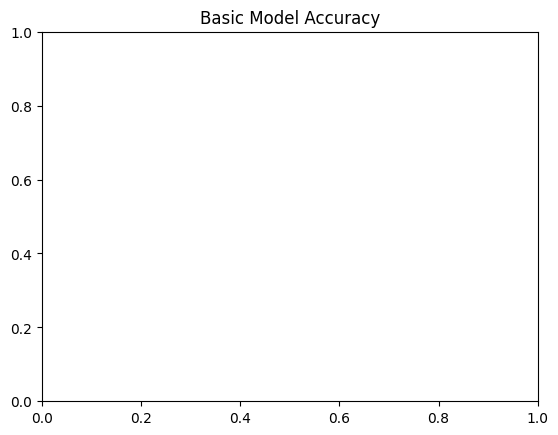

In [6]:
plt.title("Basic Model Accuracy")
plt.plot(history.history['accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.show()

Text(0.5, 0, 'Epoch')

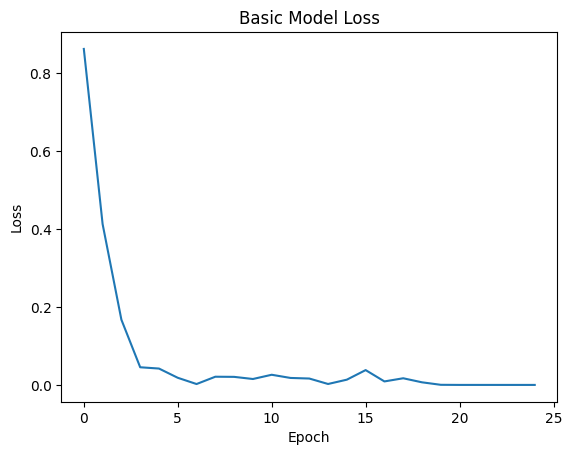

In [9]:
plt.title("Basic Model Loss")
plt.plot(history.history['loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print(dict(zip(model.metrics_names, score)))

{'loss': 0.9305910468101501, 'accuracy': 0.8810068368911743}


In [7]:
import keras

keras.models.save_model(model, 'deep_cnn_model.h5', save_format='h5', overwrite=True, include_optimizer=True)

In [13]:
model.predict(x_test[0:5])

1/1 [==============================] - 0s 172ms/step


array([[4.9794331e-01, 3.4233868e-01, 1.5969683e-01, 2.1256785e-05],
       [9.9918312e-01, 8.1007689e-04, 8.9412557e-09, 6.8214918e-06],
       [9.9993253e-01, 1.1232725e-06, 6.5331915e-05, 1.0624620e-06],
       [9.9984026e-01, 1.5942272e-04, 2.0169095e-07, 2.1494527e-08],
       [9.9997532e-01, 7.3153636e-08, 9.9042309e-06, 1.4754123e-05]],
      dtype=float32)

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print(dict(zip(model.metrics_names, score)))

{'loss': 0.9305910468101501, 'accuracy': 0.8810068368911743}


In [8]:
keras.models.load_model('deep_cnn_model.h5')

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(256, 256, 1)))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 252, 252, 128)     3328      
                                                                 
 conv2d_45 (Conv2D)          (None, 249, 249, 64)      131136    
                                                                 
 dropout_15 (Dropout)        (None, 249, 249, 64)      0         
                                                                 
 conv2d_46 (Conv2D)          (None, 247, 247, 32)      18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_47 (Conv2D)          (None, 121, 121, 32)      9248      
                                                      

In [29]:
model = keras.models.load_model('result/model.h5', compile=True, custom_objects=None, options=None)

In [28]:
score = model.evaluate(x_test, y_test, verbose=1)
print(dict(zip(model.metrics_names, score)))

41/41 [==============================] - 87s 2s/step - loss: 0.6126 - accuracy: 0.8719
{'loss': 0.6126449108123779, 'accuracy': 0.8718535304069519}


In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

41/41 [==============================] - 114s 3s/step
[[257  23  16   4]
 [ 52 227  18   9]
 [ 18  11 271   0]
 [  2   1   0 402]]


In [35]:
from sklearn import metrics

y_test = [{"glioma": 0, "meningioma": 1, "pituitary": 2, "notumor": 3}[i] for i in y_test]
y_pred = [{"glioma": 0, "meningioma": 1, "pituitary": 2, "notumor": 3}[i] for i in y_pred]

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       300
           1       0.87      0.74      0.80       306
           2       0.89      0.90      0.90       300
           3       0.97      0.99      0.98       405

    accuracy                           0.88      1311
   macro avg       0.88      0.87      0.87      1311
weighted avg       0.88      0.88      0.88      1311



In [36]:
import tensorflow as tf

print(tf.math.confusion_matrix(labels=y_test, predictions=y_pred))

tf.Tensor(
[[257  23  16   4]
 [ 52 227  18   9]
 [ 18  11 271   0]
 [  2   1   0 402]], shape=(4, 4), dtype=int32)
